In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, ElasticNet
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
import pandas.testing as tm
from pprint import pprint
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing libraries we will use


In [2]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

Fetching and downloading the california data set

In [3]:
california


{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

In [4]:
X = california.data
y = california.target
df_x = pd.DataFrame(X)
df_y=pd.DataFrame(y)
df_x.columns = california.feature_names 
df_x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


creating a dataframe of the data

In [5]:
df_x.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [6]:
df_y.describe()

,0
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


In [7]:
#checking for null values in features
missing_values = df_x.isnull().sum()
target_missing_values = df_y.isnull().sum()
print(missing_values)
print(target_missing_values)

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
0    0
dtype: int64


Data can have missing values for a number of reasons such as observations that were not recorded and data corruption. Handling missing data is important as many machine learning algorithms do not support data with missing values. Luckily, in our dataset there are no missing values that there is no need of employing strategies such as Replacing With Mean/Median/Mode or deleting those rows.


In [8]:
df_x.shape

(20640, 8)

The shape attribute of pandas.DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns). In our case we have 20640 rows and 8 columns

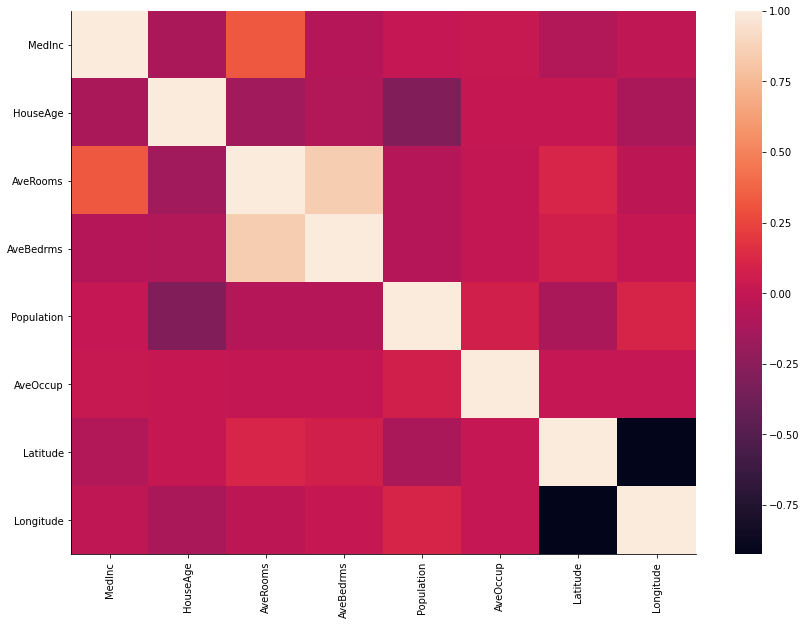

In [9]:
corr = df_x.corr()
g = sns.heatmap(corr)
sns.despine()
g.figure.set_size_inches(14,10)
plt.show()

We used a Heatmap make it easier to be able to visualize the data and understand it at a glance. The stronger the color, the higher the correlation magnitude and the lighter the color the lower the correlation. Correlation is a measure of how strongly one variable depends on another.

Our heatmap displays the correlation of the different features with each other. You will notice that we have some negatives, this means that those features are have an inverse relationship. Thus like in longitude and latitude when one increases the other drops. The ones with positive Correlation: means that if a feature increases then other feature also increases like the MedInc-x axis and MedInc - y axis which can be said to have perfect positive correlation because it is the same feature. Both features move in tandem and they have a linear relationship.

Since our data set has perfect negative correlation in Latitude and Longitude, there is a high chance that the performance of the model will be impacted by a problem called — “Multicollinearity”. Multicollinearity happens when one predictor variable in a multiple regression model can be linearly predicted from the others with a high degree of accuracy. This can lead to skewed or misleading results.

In [10]:
df_x.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

dtypes is a pandas property that returns data type of each column. we see that all features are Double precision floats

In [11]:
#df_y.dtypes
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(df_y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


This is because we are passing floats to a classifier which expects categorical values as the target vector in the logistic regressor cell thus the function encodes the target labels with value between 0 and n_classes-1.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_x,encoded,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

Here we are splitting the data where we will use 70% for training and 30% for testing dataset, with the 'test_size' argument specifying the percentage of data to be kept in the test data. Finally, we print the train and test shapes.

We are splitting data because in all feature selection procedures, it is a good practice to select the features by examining only the training set. This is to avoid overfitting.

In [13]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Since the columns are different in scale, they are Standardized to have common scale while building machine learning model. "fit_transform" fits the data and then transforms it.

In [14]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l1',
                                             random_state=None,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

We have done model fitting and feature selection, altogether in one line of code. First we specify the Logistic Regression model which will be used in model fitting, and I make sure I select the Lasso (L1) penalty which will determine how many features are retained.Then I use the selectFromModel object from sklearn, which will select the features which coefficients are non-zero.

In [15]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

True is for the features that lasso thought is important (non-zero features) while False is for the features whose weights were shrinked to zero and are not important according to Lasso.

In [16]:
X=StandardScaler().fit_transform(X)
X

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

Standardizing X

In [17]:
pca_with_varia = PCA(0.9)
pca_with_varia.fit_transform(X)
pca_with_varia.n_components_

5

Get the number of components required to explain 90% of the variance

In [18]:
pca = PCA(n_components = 2)
pc_s = pca.fit_transform(X)
pca_data = pd.DataFrame(pc_s, columns=['PC 1', 'PC 2'])
pca_data['Target'] = df_y
pca_data.head()

,PC 1,PC 2,Target
0,1.882704,-0.503362,4.526
1,1.371120,-0.121406,3.585
2,2.086868,-0.501136,3.521
3,1.575801,-1.239495,3.413
4,1.591206,-1.345264,3.422


Attempt to train and score the models using all principal components.

In [19]:
pca_data

,PC 1,PC 2,Target
0,1.882704,-0.503362,4.526
1,1.371120,-0.121406,3.585
2,2.086868,-0.501136,3.521
3,1.575801,-1.239495,3.413
4,1.591206,-1.345264,3.422
...,...,...,...
20635,1.386779,-1.296137,0.781
20636,1.875219,-0.671533,0.771
20637,1.402357,-1.096426,0.923
20638,1.542943,-1.059408,0.847


In [20]:
final_dataset_array=pca_data.to_numpy()
#final_dataset_array

creating new data set array

In [21]:
pca.explained_variance_ratio_

array([0.25336868, 0.23516245])

In [22]:
min_val=np.min(final_dataset_array,axis=0)
max_val=np.max(final_dataset_array,axis=0)
X,y=np.meshgrid(np.linspace(min_val[0],max_val[0],20),np.linspace(min_val[1],max_val[1],20))

In [23]:
regressor=LassoCV()
training_final=np.c_[final_dataset_array[:,0],final_dataset_array[:,1]]
regressor.fit(training_final,final_dataset_array[:,2])
weight_1=regressor.coef_[0]
weight_2=regressor.coef_[1]
b=regressor.intercept_
Z=weight_1*X + weight_2*y + b

The selected features are then be used to train your models. The general linear regression equation but instead of m and c we have weight and bias denoted by w and b respectively

Text(0.5, 0.92, 'Plane/Line of best fit')

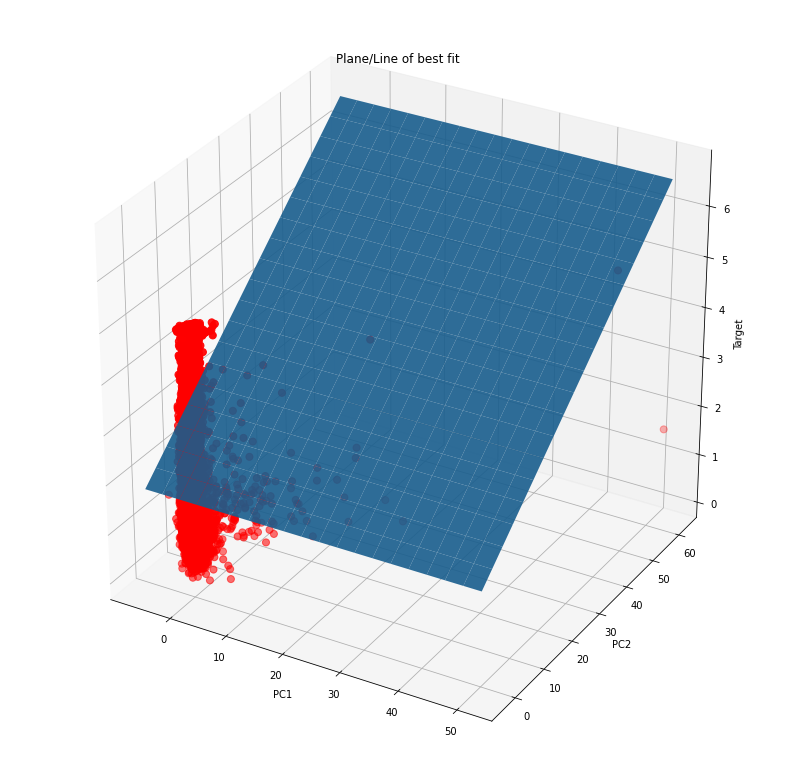

In [24]:
figure1=plt.figure(figsize=(14,14))
ax=figure1.gca(projection='3d')
ax.plot_surface(X, y, Z, rstride=1, cstride=1, alpha=0.9)
ax.scatter(final_dataset_array[:,0],final_dataset_array[:,1],final_dataset_array[:,2], c='r', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('Target')
ax.set_title('Plane/Line of best fit')

plotting the data to visualize the plane of best fit



Pair plot of attribute to target relationships to show data distribution

**Using Seaborn Library do draw a pair plot**

---

We examine the features by plotting attribute to target relationships to show data distribution and see which features are relevant.
Seaborn Library combines powerful aspects of Matplotlib and Pandas DataFrames.

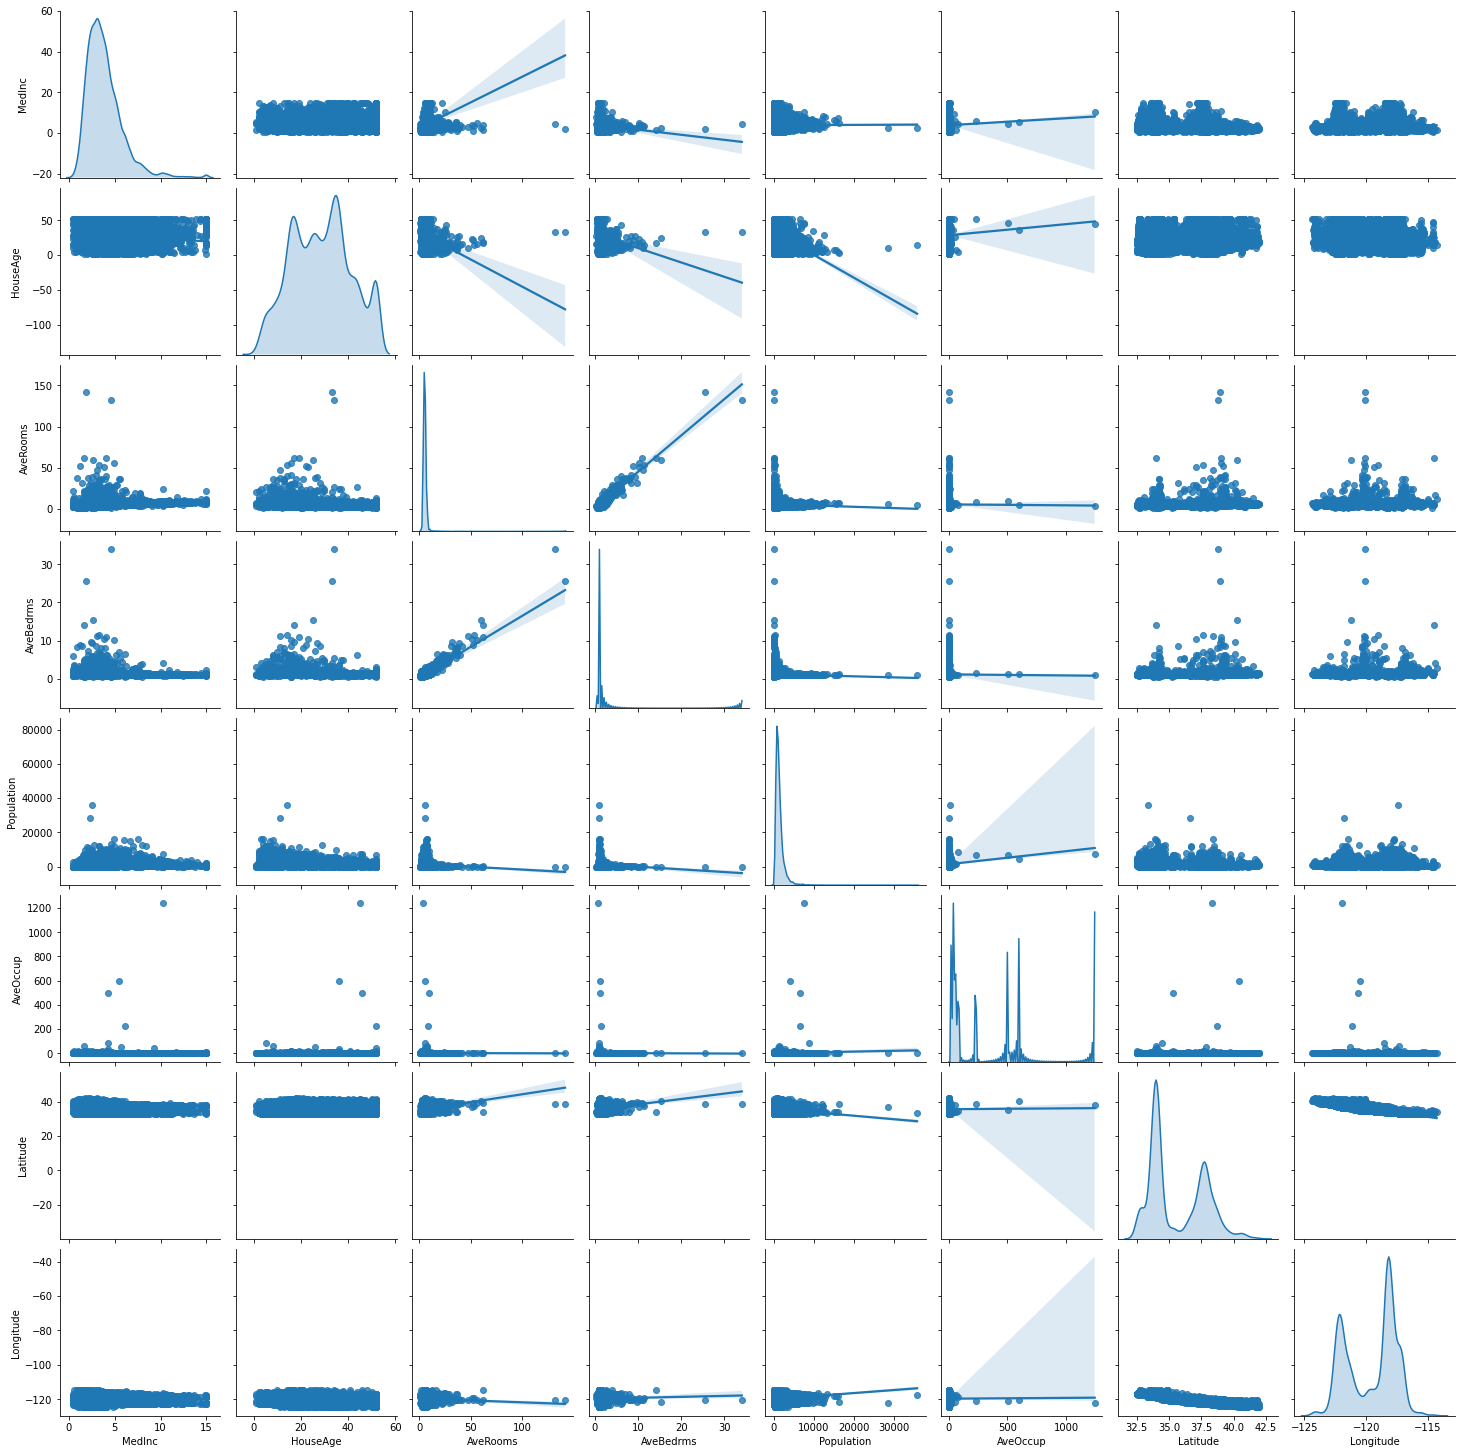

In [25]:
sns.pairplot(df_x,kind='reg',diag_kind='kde')

**Model Selection**

---

Building a regression model to predict house prices. We aim at choosing the most suitable regression model for the most accurate predictions.

First we compare the different regression models by obtaining the models' train and test scores and compare the accuracy.

In [26]:
# define function to calculate train and test scores
def calc_scores(mod, X_train, X_test, y_train, y_test):
    models[mod].fit(X_train, y_train)
    train_res = models[mod].score(X_train, y_train)
    test_res = models[mod].score(X_test, y_test)
    return train_res, test_res

We compute train and test scores using the different regression models, store the scores in a Pandas dataframe and train the models.

In [27]:
train_scores = []
test_scores = []
models = {
          'LassoCV':linear_model.LassoCV(),
          'Lasso':linear_model.Lasso(),
          'LinearRegression':linear_model.LinearRegression(),
          'ElasticNet':linear_model.ElasticNet(),
          'Ridge':linear_model.Ridge()
          }
names =['LassoCV','Lasso','LinearRegression','ElasticNet','Ridge']

scores_df = pd.DataFrame(columns=['Train score', 'Test score'], index=names)
# define function that fits the model and gets the train and test scores
def mod_score(X_train, X_test, y_train, y_test):
        for mod in models:

            train_res, test_res = calc_scores(mod, X_train, X_test, y_train, y_test)
            train_scores.append(train_res)
            test_scores.append(test_res)
        scores_df['Train score'] = train_scores
        scores_df['Test score'] = test_scores
       
        train_scores.clear()
        test_scores.clear()
        return scores_df

mod_score(X_train, X_test, y_train, y_test)

,Train score,Test score
LassoCV,0.602304,0.586920
Lasso,0.613146,0.598736
LinearRegression,0.613193,0.598766
ElasticNet,0.560566,0.545780
Ridge,0.613193,0.598765


Finally, we selct the model based on the scores that do not overfit or underfit the data so as to avoid bias when making the prediction. We chose the Ridge regression model because of the high adjusted r-squared value that the model possesses over the dataframe.

Here we perform cross validation on the training data to assess the performance of the model outside the data it was trained on.


In [28]:
val_scores=[]
scores_df= pd.DataFrame(columns=['Train score'],index=names)
kfold = KFold(n_splits=2)

for i in models:
  regressor = models[i]
  cross_validation = cross_val_score(regressor,X_train,y_train,cv=kfold)
  accuracy = cross_validation.mean()
  val_scores.append(accuracy)
scores_df['Train score'] = val_scores
val_scores.clear()
scores_df


,Train score
LassoCV,0.549579
Lasso,0.612356
LinearRegression,0.612319
ElasticNet,0.559841
Ridge,0.612324


Select hypaparameter values. Hypaparameter values are used to control the learning process of the model

In [29]:
lasso_params = { 'alpha':[0.02,0.024,0.025,0.026,0.03], 'max_iter':[1000,1100,2000],'tol':[0.001,0.0001,0.000001]}

Perform the randomized hyperparameter tuning. Hypaparameter tuning chooses a set of optimal hypaparameters that are used for the learning algorithm


In [ ]:
random = RandomizedSearchCV(model,param_distributions=lasso_params,cv=3,n_jobs=-1)
results = random.fit(X_train,y_train)
print(results.best_score_)
print("Best Params are ", results.best_params_)
results.score(X_test,y_test)